# Week 2: Finding Replication Origins

---



## 1.1 The Simplest Way to Replicate DNA

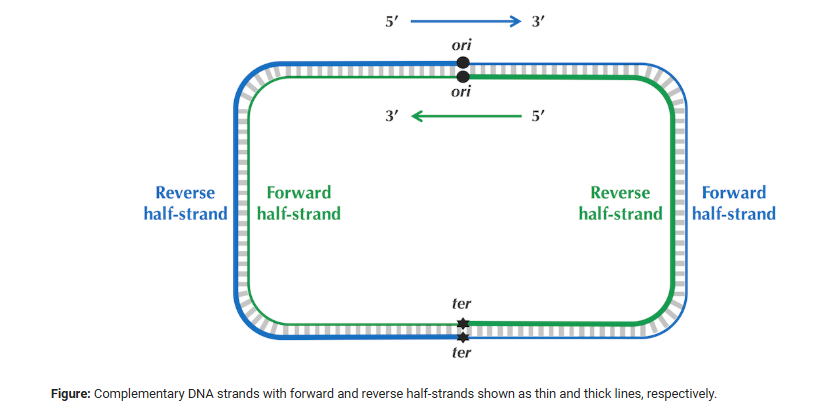



> DNA polymerase is unidirectional, meaning it can only copy a template strand in the 3' → 5' direction. This limitation fundamentally alters the process, creating an asymmetry that requires the circular chromosome to be conceptually divided into four distinct segments: two forward half-strands (which run 5'→3' away from the ori) and two reverse half-strands (which run 3'→5')


## 1.2 Asymmetry of Replication

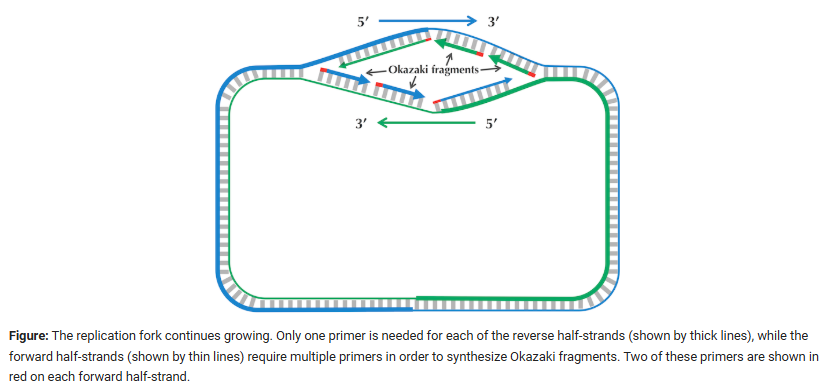



> The unidirectionality of DNA polymerase creates a fundamental asymmetry in DNA replication, causing the two parent strands to be copied differently. On the reverse (leading) half-strands, the new DNA is synthesized continuously in one long piece as the replication fork unwinds. In contrast, on the forward (lagging) half-strands, the polymerase must work discontinuously, creating short, separate pieces called Okazaki fragments by repeatedly synthesizing backwards toward the origin as the fork opens. Finally, an enzyme called DNA ligase stitches these fragments together, completing the process and resulting in one strand being built smoothly while the other is assembled piece by piece.



## 1.3 Peculiar Statistics of the Forward and Reverse Half-Strands

1.  **Replication Asymmetry Leads to Mutation Bias:** Due to the lagging strand synthesis, the forward half-strand of DNA spends more time single-stranded than the reverse half-strand.
2.  **Increased Deamination:** Single-stranded DNA is far more susceptible to a specific type of mutation called deamination, where cytosine (C) spontaneously mutates into thymine (T).
3.  **Nucleotide Imbalance:** This increased mutation rate causes a noticeable imbalance: the forward half-strand becomes depleted of C, while the reverse half-strand (which is templated by a C-rich strand) becomes depleted of G.
4.  **A New Statistical Signal:** The frequency of guanine (G) is consistently higher than cytosine (C) on the forward half-strand, and the opposite is true for the reverse half-strand.
5.  **Introducing GC Skew:** This phenomenon can be quantified by calculating the "GC Skew," defined as the running total of `(#G - #C)` as we move along the genome.
6.  **Skew Diagram:** A "skew diagram" plots this cumulative `(#G - #C)` value at each position along the entire linearized genome.
7.  **Predictable Skew Behavior:** The GC skew consistently decreases along the reverse half-strand and consistently increases along the forward half-strand.
8.  **The Minimum Point is Key:** The point where the skew diagram switches from decreasing to increasing must be where the reverse half-strand ends and the forward half-strand begins.
9.  **The Origin of Replication `(ori)`:** This transition point is precisely the location of the origin of replication (`ori`). Therefore, the `ori` should be located at the position where the GC skew reaches its absolute minimum.
10. **The Minimum Skew Problem:** This biological insight creates a new, solvable computational problem: find all positions `i` in a genome string that minimize the GC skew.

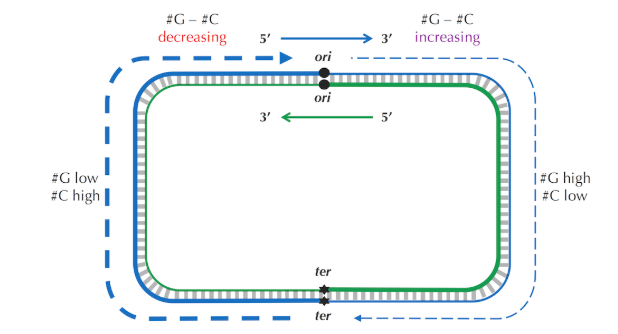

In [1]:
def skew(Genome):
    # Initialize the skew list with 0. This represents the skew at the very beginning of the genome.
    skew = [0]
    for i in range(len(Genome)):
        if Genome[i] == 'G':
            skew.append(skew[i] + 1)
        elif Genome[i] == 'C':
            skew.append(skew[i] - 1)
        else:
            skew.append(skew[i])
    # The final list contains the cumulative skew at each position in the genome.
    return skew

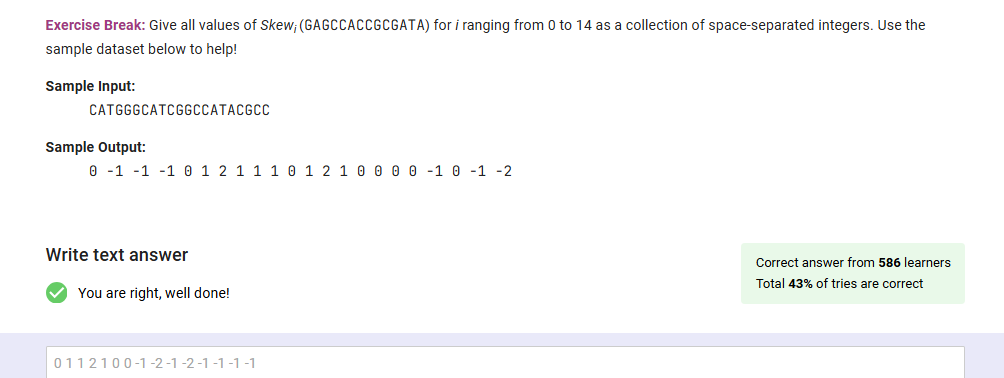

In [9]:
# Let's test our skew function with this exercise: Give all values of Skewi (GAGCCACCGCGATA) for i ranging from 0 to 14 as a collection of space-separated integers.
print(" ".join(map(str, skew('GAGCCACCGCGATA'))))

0 1 1 2 1 0 0 -1 -2 -1 -2 -1 -1 -1 -1


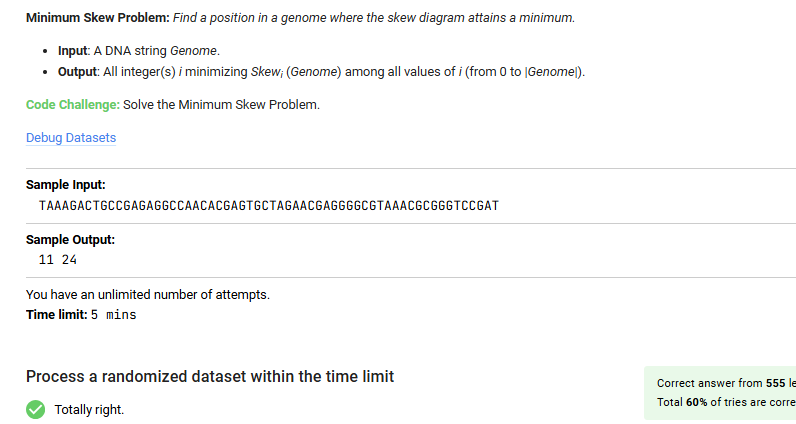

In [13]:
#@title here the uploaded dataset of the challange
from google.colab import files
import io
uploaded = files.upload()
for fn in uploaded.keys():
  Genome = io.StringIO(uploaded[fn].decode('utf-8')).read()

Saving dataset_30277_10 (6).txt to dataset_30277_10 (6).txt


In [16]:
def MinSkew(Genome):
    # Calculate the skew values for the genome
    skew_values = skew(Genome)
    # Find the minimum skew value
    min_value = min(skew_values)
    # Find all indices where the skew value is equal to the minimum value
    min_indices = [i for i, value in enumerate(skew_values) if value == min_value]
    return min_indices

In [21]:
MinSkew(Genome)

[85294, 85295]

## 1.4 Some Hidden Messages are More Elusive than Others

1.  **Initial Failure in *E. coli*:** The initial strategies, finding frequent k-mers or the minimum GC skew, fail to identify obvious DnaA box clumps in the predicted `ori` region of *E. coli*.

2.  **Biological Insight from Mismatches:** DnaA protein is not perfect; it can bind to sequences that are close, but not identical, to the "ideal" DnaA box. This means we should search for *approximate* matches, not just exact ones.

3.  **Introducing Hamming Distance:** To quantify "approximate," the concept of Hamming distance is introduced. It's a simple count of the number of nucleotide positions that differ between two strings of the same length.

4.  **A More Powerful Problem:** The goal shifts from finding frequent exact k-mers to solving the **"Frequent Words with Mismatches Problem."** This new problem seeks k-mers that are most frequent when allowing up to `d` mismatches.

5.  **Target k-mers Might Not Exist:** An important realization is that the "most frequent" k-mer with `d` mismatches might not even appear exactly in the text itself. It could be a consensus sequence that best represents a family of similar, mutated k-mers.

6.  **Defining the d-Neighborhood:** The key to solving this is to find the **`d`-neighborhood** of a k-mer, which is the set of all possible k-mers that are within `d` mismatches of the original.

7.  **An Inefficient First Approach:** A brute-force solution would be to generate every possible k-mer (`4^k` of them) and count its approximate occurrences, but this is computationally infeasible.

8.  **A Smarter Algorithm:** A more efficient algorithm involves sliding a window along the genome. For each actual k-mer found in the text, it generates its `d`-neighborhood and increments a counter for every k-mer in that neighborhood.

9.  **Considering Both Strands:** DNA is double-stranded, so a truly robust search must also account for the **reverse complement**. The problem is further refined to find k-mers that maximize the combined count of approximate matches for the k-mer *and* its reverse complement.

10. **Final Refined Problem:** The ultimate goal becomes solving the **"Frequent Words with Mismatches and Reverse Complements Problem,"** which provides the most biologically realistic and powerful method for finding potential DnaA boxes.

### The challenge of Hamming distance

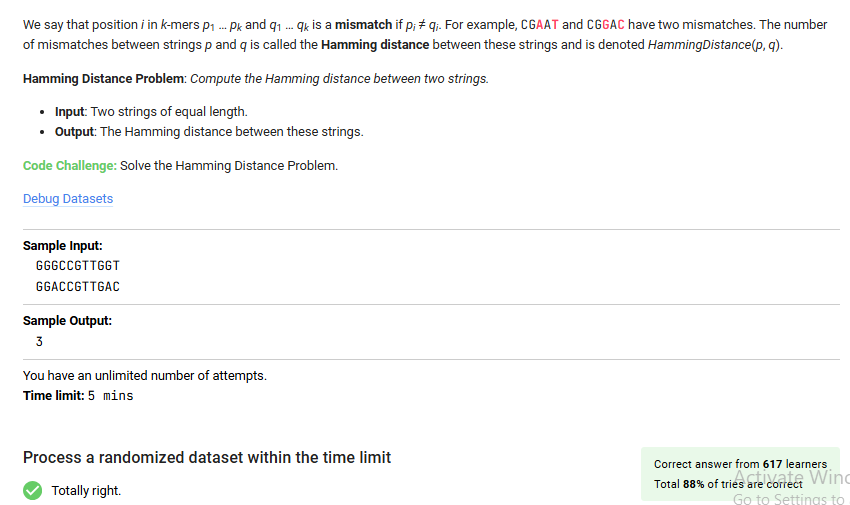

In [22]:
def HammingDistance(p, q):
     count =0
     for i in range(len(p)):
        if p[i] != q[i]:
            count +=1
     return count

In [23]:
#@title the dataset given in the challenge
p = 'TGGAGTCGGCAGTATTTCCGATGCGAGTTTTTATATGCGTCTCGGCGTCAATTACGATCTTACGGCTTACTTGTTACTAACTTAAGTCCCATTATGTTTCTATAGAGCGACCGTAGGTTTGATAGGCACCGGCCAACATGAGATCATCGATCGCGTTTACCCATCTGTCACACATGCTATGCCTAGCGGCCACGAACTAGATCGTACATGGACTCGTTTTCGCTATGCCAAATACGACAAAGATTATCGGTGAACAGATCTGGTCCCGGGTTTAATCTCGGGGGGGCCTGCCTTGGCCGGGTTGGGGCGACTTCCATGTACGATTTATATGTTTATGTCTAGGTACGGACGGGGTCACCAGAGGCAACTGACTCGTGTATCTCGTGACTTCTGATTCCTTGTCATGTCTCGGGTACCCCCTGCCGTCCCTGGATTTGGGCGTGGGACGTCTCCAGAAGCATCCGAGCATGGCTCTATCCCCGCAAACCGATAACAGGTCGCACTTCTCGTGCCAGTACGAGCACGGCGGCTTGTGATTGTTTTGTCAGTAGGCGCAACCTAAACCGTTCCACGTATACTTGGATCGGCGGCCCGAAAGTTACTCCTGGGCGCATGGCGGGTTCTACGACTATTACCTGTAAGGACAATGGAACTACACGGAAATAACGGCTCGCACGTTGTCACCGGGCGAGGCATCCTTACGTCGCGTAACAAAGGAATCTATTTCCGTAACTACCTTCTTGGAAATCATTAATTGAACAGGATATGGGCCGTTCCTCTTTCTACGTGGGAGGCACGCAGACAGAATATCACACCCGTTCAGGTTGCATCAGCACTGCTTTCTCGATGAGGTTTCATACAGTATGACGATTTGTGAGAACTCTCTAACTTTCAATCACCTGTCATAAATCGCTGGACATATTGGTTGACGGCCCTCTTTCTTTTGCCGGGGTAATCGCCGTGAGGTAGTCTATAAGGTAGGAGATTTGCTCCGTATTAAACCACCTCCCACATCAACACTTGTCGGCCGGAGAAGTACTTAAGAGATGAATTTTCGCTCGAACGGTTAGTCTGGTCCTGGATATATG'
q = 'GCATACGTGAGTGTAGTGACTATGGAATTGATACGATAGGTGCTGCCTAACTACTCCGTACCGTTGGTTACGGCGTTGTGAATTGACCCGCCGAAGTCTACATTGGGTTCGAAGTGCGAGCGAGGGTAGTAGACTCTTCAAAAAGGTTGATTTCATGCCTTCTGGCTAAACCACCGGGCCATAGCACAACGCACCACGTATAACAAAAATATGTTATGAGCCTGACCGATACGTGGCTATATAGCTGCACGTGTCAAAATTAGGGCTATGTCGCAAGCATGAGGTTTTTTTCGCGGGAAGAGACATACTTTTTCAACCAGCAACCACCCAGCCGTCTGGGAACGTTTCTGGGCCCCACAAAGTTGCGGGAGTCTCCGGTTATTATGGCCATCAAGCGCACCCGGGGTTTGTCGATTGAAAGAAACTTCGTCCGGGCCGTAGGGGGCACCGTGGACATTTGGAGCTGGCTTGATCGTCCCGTAAGTAACCTTCTTCTTTATAGAATTTCTCGTGCTGTAAACCTTATAACATTATGGACCCACTATTTCTTCGGTCGATCGCCCGTGACCCCACCACTACACCCTATCCTCGGGCAACTCAATGGTATTCTCCAGCCACAGGATCGCCATGCCGCGCATGGCCTACTGAAACGACCGCTCCTCGTAAAGGTCCACTGTAGCACGGCTAACCGGCATCTGTAGCTCCGACTCATGGTTAGTATAACATCGAGTCCATAGCGGCGTTAAAACATTCGATTGTTATCGGTGACATGCATCTCGGTAGCGTTAATTTATTTAGTACCAACTCACGTGTGGCCACAAGAAAACGTAGCTCGGGACCCGCTTAAGAGCCTACGCCAATGTACGATCTCCGCCTACTGGCGCGGTCGGGGGGCCCCCGGCAGGCCCGGGGGCCTATCCGAGTAGTTAGCGTTTCCTAAGAGGCTTTGTGCAATCAGATCTCAAAGCGGGGAGGAGGCGAACTTATGACCACCCTCACCCCAGTCACGATGGTATAAATTACCCCGGGTAACGTACACGCTTTCTGAAAAAACATCAGAGGTCTGACGAAAGAGTTAAAAATTCGTT'

In [24]:
HammingDistance(p, q)

830

### Challenge of Approximate Pattern Matching Problem


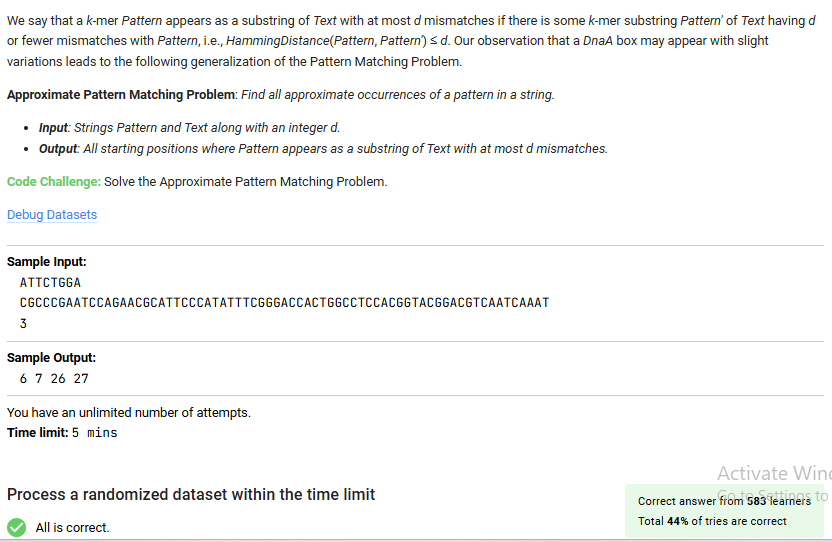

In [26]:
def findoccur(Text, Pattern, d):
    Indecies = []
    # We'll slide our search window across the text, looking for our pattern...
    for i in range(0, (len(Text) - len(Pattern)+1)):
       if HammingDistance(Text[i:i+len(Pattern)], Pattern) <= d:
          # If the number of mismatches is within our tolerance 'd', we've found a spot! Let's mark its starting position.
          Indecies.append(i)
    return Indecies

In [27]:
#@title I used the dataset given in the challenge
from google.colab import files
import io
uploaded = files.upload()
for fn in uploaded.keys():
  filew = io.StringIO(uploaded[fn].decode('utf-8')).read()
Pattern =filew.split()[0]
Text = filew.split()[1]
d = int(filew.split()[2])

Saving dataset_30278_4 (2).txt to dataset_30278_4 (2).txt


In [31]:
# Now that we've found all the hiding spots (indices) where our pattern approximately appears,
# let's turn that list of numbers into a neat, space-separated string for pastable answer.
" ".join(map(str,findoccur(Text, Pattern, d)))

'4 19 20 30 38 63 64 80 94 106 161 168 175 187 198 233 241 246 257 268 306 307 338 347 365 374 382 425 441 478 523 524 533 550 558 591 643 648 668 705 737 748 805 823 827 837 848 867 868 910 921 933 957 970 979 987 997 1001 1018 1091 1101 1107 1166 1190 1206 1207 1226 1239 1272 1283 1304 1312 1335 1361 1378 1391 1420 1444 1489 1513 1523 1542 1560 1568 1585 1590 1603 1612 1638 1662 1666 1667 1671 1675 1696 1709 1734 1762 1764 1784 1795 1860 1878 1888 1898 1901 1945 1952 1967 2000 2022 2047 2062 2067 2130 2138 2148 2185 2190 2256 2320 2321 2351 2356 2401 2402 2417 2422 2455 2472 2497 2518 2536 2597 2607 2627 2674 2686 2696 2697 2706 2728 2746 2747 2773 2780 2792 2805 2872 2887 2929 2956 2981 2993 3026 3050 3095 3143 3152 3167 3182 3189 3207 3227 3238 3247 3262 3276 3282 3287 3316 3324 3335 3353 3364 3405 3415 3416 3431 3448 3462 3482 3566 3577 3600 3619 3647 3651 3663 3671 3691 3700 3712 3714 3721 3723 3736 3756 3773 3774 3808 3818 3825 3826 3840 3857 3869 3889 3898 3899 3916 3925 3926 3

### Another exercise to count the occurrences of a Pattern at most 2 mistaches
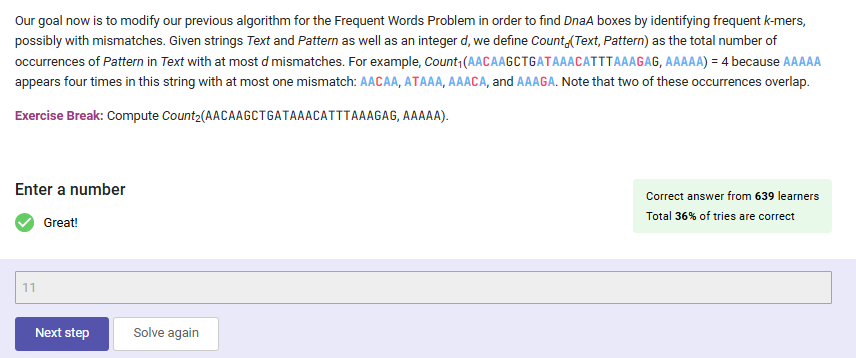

In [34]:
# Finding the count by len() method
len(findoccur('AACAAGCTGATAAACATTTAAAGAG', 'AAAAA', 2))

11

### The challenge of ApproximatePatternCount.





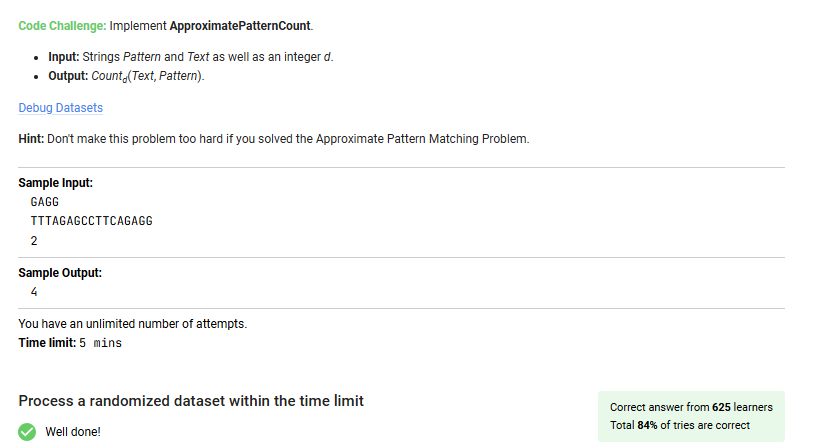

In [47]:
#@title Dataset given in the challenge
Text = 'AGCCCAATGTTCGCGGATGTTGAGAAACATTCTGTTACGGACCGGGCCCCGGGCATAGCCATCTTCCAGTTTGAGCTCCGTTAGAAATTCCAAGTAGGTCTTGGACGTTCACAAACCTATAGGTAGGAAGACGATTAAAATGCCACCGGTCCTGTCACAATCTCAAAGCGACCCTAGTCTGTTAACGCCACAGGGTAGTGTAGCGCAAGAACCGTAACATTTGTTTATTAAATCGACTCAGTTTGAGACGTGTGCATGGACTAGCCTCTGTAGTCTCAACACCGGGTGGTGGTGCTGCAAGTATCAGT'
Pattern ='AGTATCA'
d =3

In [48]:
def ApproximatePatternCount(Text, Pattern, d):
    count = 0
    for i in range(len(Text) - len(Pattern) + 1):
        PatternPrime = Text[i : i + len(Pattern)]
        if HammingDistance(Pattern, PatternPrime) <= d:
            count = count + 1
    # Return the total count of approximate pattern occurrences
    return count

In [49]:
# Finding the count by len() method
ApproximatePatternCount(Text, Pattern, d)

26

In [51]:
len(findoccur(Text, Pattern, d))

26

### The challenge of the Frequent Words with Mismatches Problem
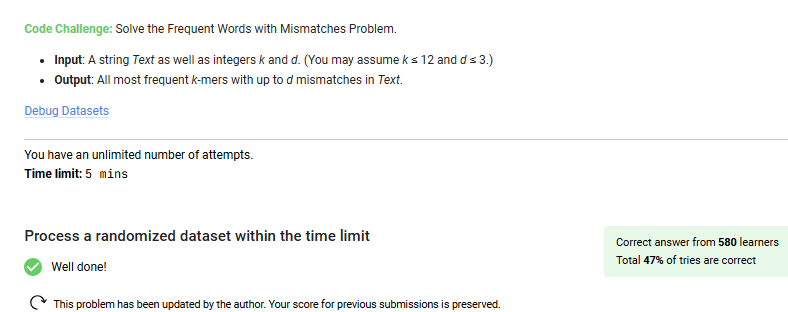

In [57]:
def MaxMap(freqMap):
    maxVal = 0  # assume counts are non-negative
    for pattern in freqMap:
        if freqMap[pattern] > maxVal:
            maxVal = freqMap[pattern]
    return maxVal

In [53]:
def Neighbors(Pattern, d):
    if d == 0:
        return {Pattern} # Return a set containing the pattern itself
    if len(Pattern) == 1: # Corrected syntax for comparison
        return {'A', 'C', 'G', 'T'}

    Neighborhood = set() # Use a set to store unique neighbors
    SuffixPattern = Pattern[1:] # Get the suffix of the pattern
    SuffixNeighbors = Neighbors(SuffixPattern, d) # Recursive call

    for text in SuffixNeighbors:
        # Calculate Hamming distance between suffix of original pattern and neighbor suffix
        if HammingDistance(SuffixPattern, text) < d:
            # If distance is less than d, we can change the first symbol
            for nucleotide in ['A', 'C', 'G', 'T']:
                Neighborhood.add(nucleotide + text) # Concatenate and add to set
        else:
            # If distance is equal to d, the first symbol must match
            Neighborhood.add(Pattern[0] + text) # Concatenate original first symbol and add

    return Neighborhood

In [54]:
def FrequencyTable(Text, k):
    freqMap ={}
    n = len(Text)
    for i in range(n - k + 1):
        Pattern = Text[i : i + k]
        if Pattern not in freqMap:
            freqMap[Pattern]= 1
        else:
           freqMap[Pattern] = freqMap[Pattern] + 1
    return freqMap

In [52]:
def FrequentWordsWithMismatches(Text, k, d):
    FrequentPatterns = []
    freqMap = {}
    n = len(Text)

    # Iterate through all possible k-mers in the text
    for i in range(n - k + 1):
        Pattern = Text[i:i+k]
        # Get all neighbors of the current pattern within distance d
        neighborhood = Neighbors(Pattern, d) # Corrected function call

        # Update the frequency map for each neighbor
        for neighbor in neighborhood: # Iterate directly over the set
            freqMap[neighbor] = freqMap.get(neighbor, 0) + 1 # Corrected frequency update

    # Find the maximum frequency
    m = MaxMap(freqMap)

    # Find all patterns with the maximum frequency
    for key in freqMap: # Iterate through the keys of freqMap
        if freqMap[key] == m: # Corrected access to frequency
            FrequentPatterns.append(key)

    return FrequentPatterns

In [55]:
#@title The dataset used by the challenge
Text = 'ATTGCTGTCGATTGTCGCTTATTGTCGCTGTCGCTGCTGATTGCTGTCGCTGCTGGGAACTTCTTATTGGGAACTGGGAACTTGGAAATTGCTTCTGATTGATTGCTGTCGCTTTCGCTGTCGTCGGGAACTTCTTCTGTCGGGAAGGAACTGCTGCTGGGAACTGATTGGGAACTGGGAAATTGATTGGGAATCGTCGCTGCTTGGAACTTCTGCTTCTGTCGTCGCTTTCGTCGATTGATTGATTGGGAAGGAAATTGCTTGGAATCGCTTGGAAATTGCTGGGAACTTTCGATTGTCGTCGCTTCTGATTGATTGCTTATTGCTTTCGCTGCTTATTGATTGTCGTCGCTT'
k =6
d =3

In [58]:
FrequentWordsWithMismatches(Text, k, d)

['TTTTTT']

In [ ]:
len(list(Neighbors('CCAGTCAATG',1)))

31

### The challenge of Frequent Words with Mismatches and Reverse Complements Problem:




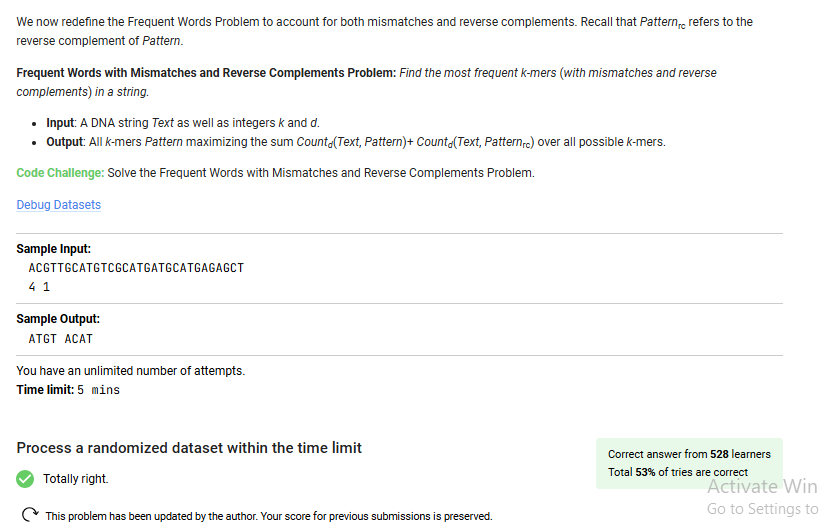

In [59]:
def reversed(Pattern):
  # Create a dictionary for nucleotide complements
  complement_map = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}
  # Use a list comprehension to get the complements and then reverse the list
  # Join the list elements into a string before returning
  return "".join([complement_map[l] for l in Pattern][::-1])

In [60]:
def FreqWordsMismatchRevComp(Text, k, d):
    FrequentPatterns = []
    freqMap = {}
    n = len(Text)

    # Iterate through all possible k-mers in the text
    for i in range(n - k + 1):
        Pattern = Text[i:i+k]

        # Get all neighbors of the current pattern within distance d
        neighborhood = Neighbors(Pattern, d) # Corrected function call
        # Update the frequency map for each neighbor
        for neighbor in neighborhood: # Iterate directly over the set
            rneighbour =  reversed(neighbor)
            freqMap[neighbor] = freqMap.get(neighbor, 0) + 1   # Corrected frequency update
            freqMap[rneighbour] = freqMap.get(rneighbour, 0) + 1   # Corrected frequency update

    # Find the maximum frequency
    m = MaxMap(freqMap)

    # Find all patterns with the maximum frequency
    for key in freqMap: # Iterate through the keys of freqMap
        if freqMap[key] == m: # Corrected access to frequency
            FrequentPatterns.append(key)

    return FrequentPatterns

In [64]:
#@title The dataset provided by the Challenge
Text ='ACGTTTCTTCACACTGTGTGTTCTGACTGACTTCCTTGTGTGTTCCTACTGTTCTGTGACTTCTTCTTCACTGTGCTTGTTCTGTGTTCACTGTGCTCTTGTGACACTGACTGACTGTGCTTGTGTGTGTTCTGTGTGTTCTGTGTTCACCTTGTGCTACTGCTACACTGTGTTCTGTGTGCTTTCACTGCTTGTGCTTTCTGTGACTGTGACACTGCATGTCGCATGATGCATGAGAGCT'
k = 7
d =3

In [63]:
FreqWordsMismatchRevComp(Text, k, d)

['TTTTTTT', 'AAAAAAA']

## 1.5 A Final Attempt at Finding DnaA Boxes in E. coli

1.  **Refocused Search:** The final attempt to find the *E. coli* `ori` focuses on a 500-nucleotide window starting at the location previously identified by the minimum GC skew.

2.  **The Winning Strategy:** The crucial change in method is to search not for exact matches, but for the most frequent 9-mers while allowing for **one mismatch** and including their **reverse complements**.

3.  **Success at Last:** This refined, biologically-aware approach works! It successfully identifies the experimentally known *E. coli* DnaA box (`TTATCCACA`) as one of the most frequent patterns in the predicted `ori` region.

4.  **Confirmation of Skew Method:** The actual `ori` is found very close to the minimum skew point, validating that the GC skew is a powerful, though approximate, indicator for locating the origin of replication.

5.  **A New Challenge: False Positives:** The search is not perfect; it also identifies several other 9-mers that are equally as frequent as the true DnaA box, creating a list of candidates rather than a single answer.

6.  **Genomes Contain Multiple Signals:** This happens because genomes are dense with information. Many other "hidden messages," like regulatory motifs for gene expression, also tend to cluster and can be mistaken for the signal you're looking for.

7.  **Computational Predictions are Imperfect:** A major lesson is that while computational tools are excellent for generating hypotheses and a short list of candidates, they are rarely conclusive on their own.

8.  **Bioinformatics and Biology Must Collaborate:** The most effective approach combines computational predictions with experimental verification from biologists to confirm which candidate is correct.

9.  **A Path Forward: Comparative Genomics:** The text suggests a way to improve predictions is to use comparative genomics—for example, searching for a similar DnaA box in a closely related species like *Salmonella* would provide strong supporting evidence.

10. **From Theory to Practice:** The chapter concludes by stressing the importance of applying these layered algorithms to real, often messy, biological data, which is the final challenge for the student.,

## 1.6 Epilogue: Complications in ori Predictions

1.  **DnaA Boxes Are Species-Specific:** The "hidden message" is not universal. Different bacteria, like *Vibrio cholerae* and *E. coli*, have evolved completely different DnaA box sequences, so you cannot simply search for a known sequence in a new genome.

2.  **The Biological Signal Can Be Weak:** Real-world genomes often complicate the search. Some bacteria have very few DnaA boxes, making their frequent-word "clump" statistically weak and difficult to distinguish from random noise.

3.  **GC Skew is an Imperfect Indicator:** While useful, the GC skew diagram is often messy and unreliable. The minimum point can be an imprecise location for `ori`, and in some species (like *Thermotoga petrophila*), the diagram lacks the clear, predictable shape seen in *E. coli*, possibly due to other evolutionary pressures.

4.  **Computational Predictions Require Experimental Proof:** Even predictions from sophisticated software like Ori-Finder are just strong hypotheses. Without experimental verification from biologists, any computationally identified `ori` could be incorrect.

5.  **The True Challenge is Applying Imperfect Tools:** The ultimate task for a bioinformatician is to combine these imperfect computational methods (frequent words with mismatches, minimum skew analysis) to analyze new, real-world data and produce the most likely candidate regions for biologists to investigate.

# The final challenge:Find a DnaA box in Salmonella enterica.

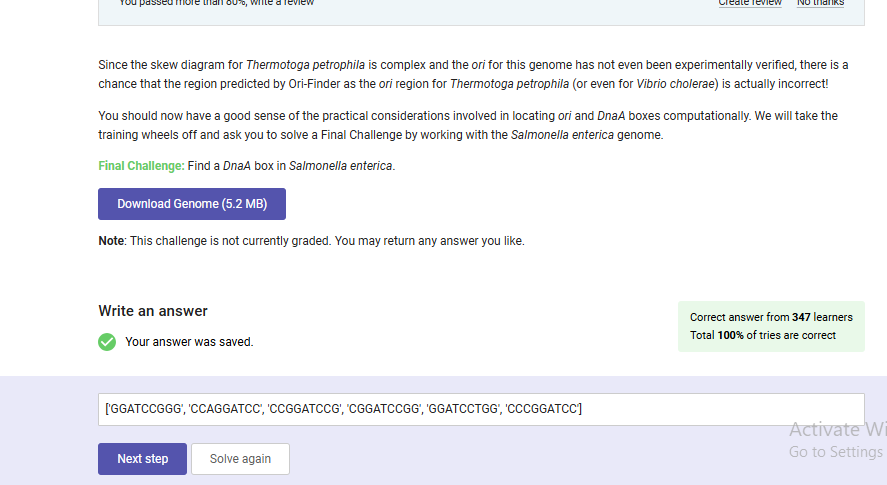

In [65]:
import requests
imported_text = requests.get("https://bioinformaticsalgorithms.com/data/Salmonella_enterica.txt").text
parts = imported_text.split("\n", 1)
first_line_removed = parts[1]
Text = first_line_removed.replace("\n", "")
k = 9
d =1

In [71]:
import sys
from collections import defaultdict
import time

# --- Helper Functions ---
def reverse_complement(pattern):
    """Computes the reverse complement of a DNA string."""
    complement_map = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}
    return "".join(complement_map.get(base, 'N') for base in reversed(pattern))

def hamming_distance(p, q):
    """Calculates the Hamming distance between two strings of equal length."""
    return sum(1 for ch1, ch2 in zip(p, q) if ch1 != ch2)

# --- Core Algorithms ---

def find_minimum_skew_positions(genome):
    """Efficiently finds all positions where GC skew is minimized (single pass)."""
    positions = []
    skew, min_skew = 0, 0
    for i in range(len(genome)):
        if genome[i] == 'G':
            skew += 1
        elif genome[i] == 'C':
            skew -= 1
        if skew < min_skew:
            min_skew = skew
            positions = [i + 1]
        elif skew == min_skew:
            positions.append(i + 1)
    return positions

def neighbors(pattern, d):
    """Recursively generates the d-neighborhood of a pattern."""
    if d == 0:
        return {pattern}
    if len(pattern) == 1:
        return {'A', 'C', 'G', 'T'}
    neighborhood = set()
    suffix_neighbors = neighbors(pattern[1:], d)
    for text in suffix_neighbors:
        if hamming_distance(pattern[1:], text) < d:
            for nucleotide in 'ACGT':
                neighborhood.add(nucleotide + text)
        else:
            neighborhood.add(pattern[0] + text)
    return neighborhood

def find_frequent_words_mismatch_rc_FAST(text, k, d):
    """
    An optimized algorithm to find the most frequent k-mers with mismatches and reverse complements.
    """
    # Step 1: Count the frequencies of k-mers that ACTUALLY appear in the text.
    # This is much faster than generating neighborhoods for every single position.
    actual_kmer_counts = defaultdict(int)
    for i in range(len(text) - k + 1):
        actual_kmer_counts[text[i:i+k]] += 1

    # Step 2: For each actual k-mer, credit its d-neighbors.
    # The score of a candidate is the sum of counts of all actual k-mers in its neighborhood.
    candidate_scores = defaultdict(int)
    for pattern, count in actual_kmer_counts.items():
        neighborhood = neighbors(pattern, d)
        for neighbor in neighborhood:
            candidate_scores[neighbor] += count

    # Step 3: Combine scores for patterns and their reverse complements to find the max.
    max_score = 0
    result_patterns = []

    for pattern, score in candidate_scores.items():
        pattern_rc = reverse_complement(pattern)
        combined_score = score + candidate_scores.get(pattern_rc, 0)

        if combined_score > max_score:
            max_score = combined_score
            result_patterns = [pattern]
        elif combined_score == max_score:
            result_patterns.append(pattern)

    print(f"Maximum combined frequency found: {max_score}")
    return list(set(result_patterns)) # Return unique patterns

In [72]:
find_frequent_words_mismatch_rc_FAST(Text, k, d)

Maximum combined frequency found: 5994


['GCGGCGGCG']

## 1.7 CS: Generating the Neighborhood of a String


### Conceptual Points

1.  **Defining the `d`-Neighborhood:** The `d`-neighborhood of a string `Pattern` is the complete set of all possible k-mers that have a Hamming distance of **at most `d`** from the original `Pattern`.

2.  **Biological Relevance:** This concept is crucial because biological binding sites, like DnaA boxes, are not always perfect. The `d`-neighborhood represents all the slight variations of a sequence that a protein might still be able to bind to.

3.  **Recursive "Divide and Conquer" Strategy:** The core algorithmic idea is to solve the problem for a string of length `k` by first solving it for a smaller string of length `k-1` (the "suffix") and then extending those solutions.

4.  **Two Core Components:** The recursive approach breaks down `Pattern` into its `FirstSymbol` and its `Suffix`. The algorithm works by combining these two parts with the neighbors of the `Suffix`.

5.  **Complexity:** Generating the `d`-neighborhood is a computationally expensive task. Its running time grows exponentially with `k` and `d`, as it must generate a vast number of possible strings.

### Algorithmic Logic Points (Recursive Approach)

6.  **Base Cases are Essential:** The recursion must have clear stopping points. If `d=0`, the neighborhood is just the `Pattern` itself. If `|Pattern|=1`, the neighborhood is all four possible nucleotides (`A,C,G,T`), as long as `d>0`.

7.  **Recursive Step:** The main step is to call `Neighbors(Suffix(Pattern), d)` to get all the neighbors of the shorter string.

8.  **The "Budget" of Mismatches:** For each `SuffixNeighbor` found, you must compare it to the original `Suffix(Pattern)` to see how much of the mismatch "budget" (`d`) was already used.

9.  **Case 1: Mismatch Budget Not Exhausted:** If `HammingDistance(Suffix(Pattern), SuffixNeighbor) < d`, it means you still have at least one mismatch left to "spend." Therefore, you can prepend **any** of the four nucleotides (`A,C,G,T`) to `SuffixNeighbor`, and the resulting k-mer will still be within `d` mismatches of the original `Pattern`.

10. **Case 2: Mismatch Budget Exhausted:** If `HammingDistance(Suffix(Pattern), SuffixNeighbor) == d`, the budget is fully spent. To avoid exceeding `d` mismatches, you are **forced** to prepend the original `FirstSymbol(Pattern)`. Any other nucleotide would create `d+1` mismatches, which is invalid.

11. **Using Sets for Uniqueness:** The result of the `Neighbors` function is a set, not a list. This is crucial to automatically handle and eliminate duplicate strings that might be generated through different recursive paths.

### Alternative (Iterative) Approach

12. **The 1-Neighborhood:** An iterative method can be built from a simpler function, `ImmediateNeighbors`, which generates all strings with a Hamming distance of exactly 1 from a given `Pattern`.

13. **Building Outwards:** The iterative approach starts with the original `Pattern` (the 0-neighborhood).

14. **Expanding Layer by Layer:** It then loops `d` times. In each loop, it takes every string currently in its collection and adds all of their `ImmediateNeighbors` to the set.

15. **Final Result:** After `d` iterations, the set will contain all strings up to `d` mismatches away from the original `Pattern`, thus forming the complete `d`-neighborhood. This method is often easier to conceptualize than recursion but can generate a lot of intermediate strings.

# 1.8 Week 2 FAQs

### Summary of Week 2 FAQs

**On Biological Mechanisms:**

1.  **DNA Polymerase Unidirectionality:** The structure of the DNA polymerase enzyme itself dictates its movement, forcing it to synthesize a new strand exclusively in the 5’ → 3’ direction, which is the root cause of replication asymmetry (leading vs. lagging strands).

2.  **How Deamination Causes Mutation:** Deamination is a chemical process where a cytosine (C) on a vulnerable, single-stranded DNA template mutates into a thymine (T). During the next replication cycle, this T is paired with an adenine (A), permanently converting a C-G base pair into a T-A pair in one of the daughter chromosomes.

3.  **Why Some Cytosine Remains:** The lagging strand doesn't lose all its cytosine because most DNA sequences are essential for the organism's survival. Mutating every C would almost certainly be lethal.

4.  **No Fixed Ratios in a Single Strand:** While a double-stranded genome has equal amounts of A and T, and G and C, there is no such required balance *within a single strand*.

5.  **GC-Content as a Species Trait:** The overall percentage of guanine and cytosine nucleotides in a genome is its **GC-content**, a stable characteristic that varies significantly from one species to another (e.g., ~20% in malaria parasite vs. 72% in some bacteria).

**On Computational Methods and Parameters:**

6.  **GC Skew is a Practical Choice:** Although deamination suggests other potential skews (like `T-C`), the GC skew (`#G - #C`) has proven to be the most empirically successful and reliable indicator for locating the `ori` in practice.

7.  **Skew Diagrams Don't End at Zero:** The final value of a skew diagram is the total G count minus the total C count across the *entire* genome. This value is rarely zero unless the genome happens to have precisely equal numbers of G and C.

8.  **Skew on Complementary Strand:** The skew diagram of the complementary strand is essentially an inverted "mirror image" of the first strand's diagram, but importantly, its minimum point still correctly identifies the same genomic location for the `ori`.

9.  **Scoring Function Flaw:** The method of scoring patterns (`Count + Count_RC`) has a known flaw where it double-counts **reverse palindromes** (k-mers that are their own reverse complement), slightly inflating their importance.

10. **Choosing Mismatches (`d`) is an Art:** Selecting the number of allowed mismatches (`d`) is a balance. In practice, biologists use intuition and data from known binding sites, usually settling on a small number like `d=1` or `d=2` to find real signals without being overwhelmed by random noise.

11. **Why No Insertions/Deletions:** Insertions or deletions are not considered in the DnaA box search because even a single base shift would likely change the structure of the short k-mer so drastically that the DnaA protein could no longer bind.

12. **Search Window Placement Requires Exploration:** Starting the search window exactly at the skew minimum was an arbitrary choice that worked for *E. coli*. A robust scientific approach requires testing multiple windows centered on and flanking the predicted `ori`.

**On the Overall Scientific Process:**

13. **Multiple Factors Influence Skew:** The simple deamination model doesn't tell the whole story; GC-skew is influenced by multiple complex mechanisms, and its effectiveness varies between species.

14. **Many Hidden Messages Exist:** A genome is dense with information. Finding other surprisingly frequent k-mers near the `ori` is common because many other regulatory signals (unrelated to replication) also tend to cluster.

15. **Computation Guides, It Doesn't Conclude:** Computational methods are powerful for generating a shortlist of strong candidates for DnaA boxes, but collaboration with biologists for experimental verification is essential to confirm the final answer.